# Agriculture Dataset

Machine Learning in Agriculture

Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.



# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Loading the DataSet 


In [2]:
df=pd.read_excel('E:/train_agriculture.xlsx')
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [3]:
df.head()#first 5 data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


# Data Description from given Data

Column Name : Description

Id: UniqueID

Estimated_Insects_Count: Estimated insects count per square meter

Crop_Type: Category of Crop(0,1)

Soil_Type: Category of Soil (0,1)

Pesticide_Use_Category: Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)

Number_Doses_Week: Number of doses per week

Number_Weeks_Used: Number of weeks used

Number_Weeks_Quit: Number of weeks quit

Season: Season Category (1,2,3)

Crop_Damage: Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

In [4]:
df.shape#no of data

(4599, 10)

we have 4599 rows and 10 columns

In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n') #value count in each column

F00007695    1
F00002030    1
F00001276    1
F00000121    1
F00004834    1
            ..
F00000889    1
F00007766    1
F00006798    1
F00005753    1
F00005848    1
Name: ID, Length: 4599, dtype: int64


1132    193
1212    187
1385    182
1056    180
1478    177
       ... 
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64


0    3565
1    1034
Name: Crop_Type, dtype: int64


0    2407
1    2192
Name: Soil_Type, dtype: int64


2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64


20.0    209
30.0    194
25.0    165
40.0    133
35.0    128
       ... 
62.0      5
59.0      5
65.0      3
66.0      3
64.0      1
Name: Number_Weeks_Used, Length: 63

In [6]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [7]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type','Pesticide_Use_Category', 'Number_Doses_Week','Number_Weeks_Quit', 'Season', 'Crop_Damage'],
 are int64 datatype, 'Number_Weeks_Used',is float datatype andID is object datatype

In [8]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

Number_Weeks_Used column have 442 null data.

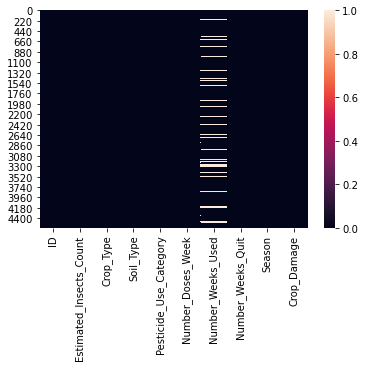

In [9]:
sns.heatmap(df.isnull())
plt.show()

In [10]:
for col in ['Number_Weeks_Used']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

fiiled with mode of the column and now no null values present

In [12]:
df.info

<bound method DataFrame.info of              ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0     F00000001                      188          1          0   
1     F00000003                      209          1          0   
2     F00000004                      257          1          0   
3     F00000005                      257          1          1   
4     F00000006                      342          1          0   
...         ...                      ...        ...        ...   
4594  F00008078                     2138          0          1   
4595  F00008079                     2139          0          1   
4596  F00008080                     2267          0          1   
4597  F00008082                     2267          0          1   
4598  F00008083                     2267          0          1   

      Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                          1                  0                0.0   
1                          1       

In [13]:
df['Number_Weeks_Used']=df['Number_Weeks_Used'].astype('int64') #converting float data into int

# Statistical Summary

In [14]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.036530,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.249436,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,26.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


observations-:
1.Mean for all the columns is greater than the median so it means  our data is positively skewed except for the Season
columns as it is negatively skewed.
2.75% and 100% have large difference means Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Used,
Number_Weeks_Quit have outliers present in the dataset.
3.Estimated_Insects_count have the highest standard deviation it means the data is spread throuth out and is not clustered
around the mean.



In [15]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.422254,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.001181,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093058,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.357684,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099563,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.422254,-0.001181,-0.093058,0.357684,0.099563,1.000000,-0.429923,-0.012550,0.222360
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.429923,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.012550,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.222360,-0.152918,-0.016196,1.000000


<AxesSubplot:>

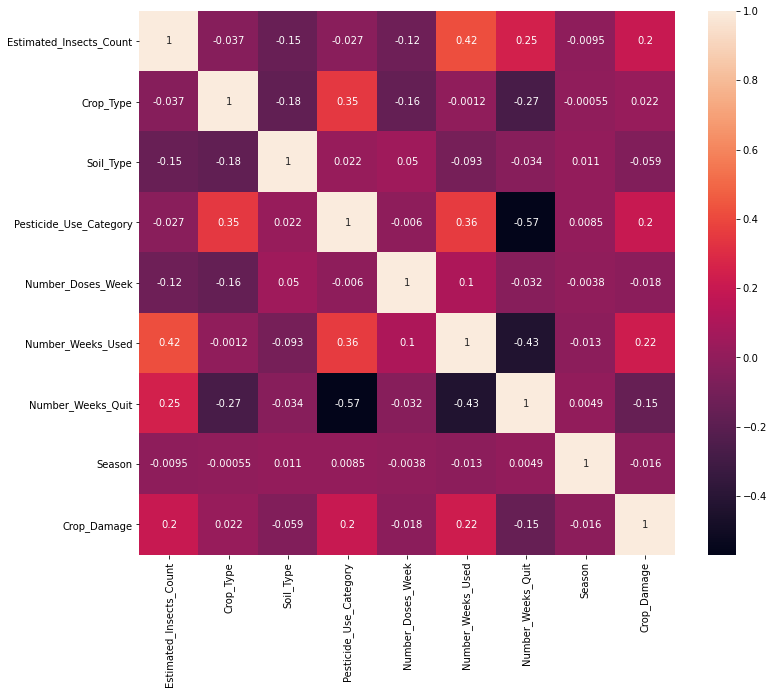

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

observation-:
1.Crop_Type and Pesticide_Used_category has some positive correlation.
2.Number_Weeks_Used has some positive correlation with the Estimated_Insetcs_Count and Pesticide_Used_Category.
3.Number_Weeks_Quit has some negative correlation with Crop_type and Number_Weeks_Used.
4.Number_Weeks_Quit has some negative correlation with Pesticide_Use-Category and Number_Weeeks_Used.


# EDA

Text(0.5, 1.0, 'Damage of crops')

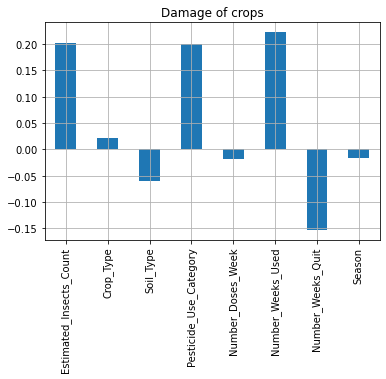

In [17]:
df.drop('Crop_Damage',axis=1).corrwith(df['Crop_Damage']).plot(kind='bar',grid=True)
plt.title("Damage of crops")

# Univariate Analysis

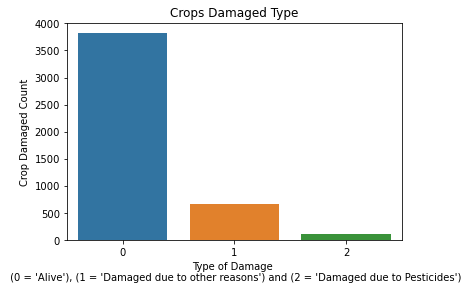

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


In [18]:
sns.countplot(x='Crop_Damage',data=df)
plt.title("Crops Damaged Type")
plt.xlabel("Type of Damage \n (0 = 'Alive'), (1 = 'Damaged due to other reasons') and (2 = 'Damaged due to Pesticides')")
plt.ylabel("Crop Damaged Count")
plt.show()
print(df['Crop_Damage'].value_counts())

Crop alive is 3820,Crop Damaged by pesticide 115 and crop damaged by other reasons is 664.

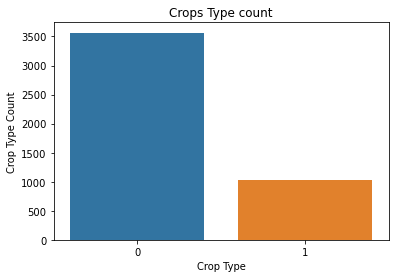

0    3565
1    1034
Name: Crop_Type, dtype: int64


In [19]:
sns.countplot(x='Crop_Type',data=df)
plt.title("Crops Type count")
plt.xlabel("Crop Type")
plt.ylabel("Crop Type Count")
plt.show()
print(df['Crop_Type'].value_counts())

two type of crops type '0' crop is around 80% of the total crop.

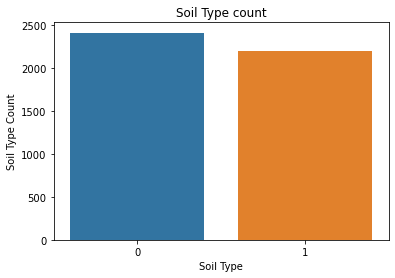

0    2407
1    2192
Name: Soil_Type, dtype: int64


In [20]:
sns.countplot(x='Soil_Type',data=df)
plt.title("Soil Type count")
plt.xlabel("Soil Type")
plt.ylabel("Soil Type Count")
plt.show()
print(df['Soil_Type'].value_counts())

two type of soils type '0' crop is around 50% and type '1' is other half of soil

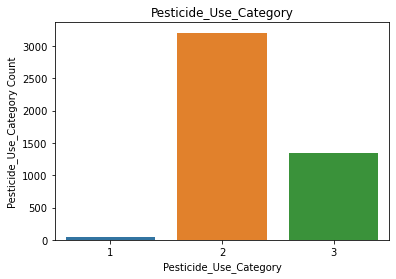

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


In [21]:
sns.countplot(x='Pesticide_Use_Category',data=df)
plt.title("Pesticide_Use_Category")
plt.xlabel("Pesticide_Use_Category")
plt.ylabel("Pesticide_Use_Category Count")
plt.show()
print(df['Pesticide_Use_Category'].value_counts())

3 types of pesticide for protection against pest. Type two is the frequenty used pesticide around 70%

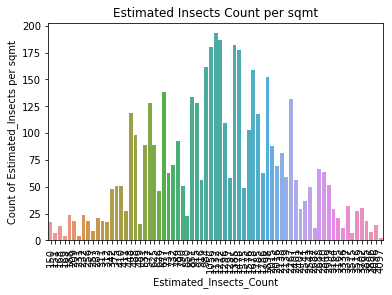

1132    193
1212    187
1385    182
1056    180
1478    177
       ... 
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64


In [22]:
sns.countplot(x='Estimated_Insects_Count',data=df)
plt.title("Estimated Insects Count per sqmt")
plt.xlabel("Estimated_Insects_Count")
plt.ylabel("Count of Estimated_Insects per sqmt")
plt.xticks(rotation=90)
plt.show()
print(df['Estimated_Insects_Count'].value_counts())


The maximum (1132) number of insects per sqmt are 193, 1212 insects per 187 sqmt and so on

In [27]:
crop_damage_alive=df[df['Crop_Damage']==0]
crop_damage_other=df[df['Crop_Damage']==1]
crop_damage_pesticide=df[df['Crop_Damage']==2]

<AxesSubplot:xlabel='alive', ylabel='Density'>

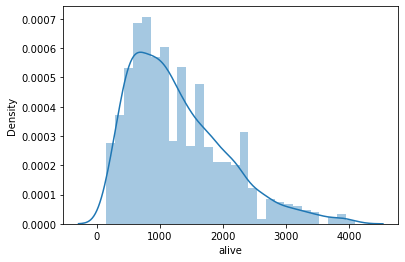

In [28]:
sns.distplot(crop_damage_alive['Estimated_Insects_Count'],axlabel='alive')

<AxesSubplot:xlabel='alive', ylabel='Density'>

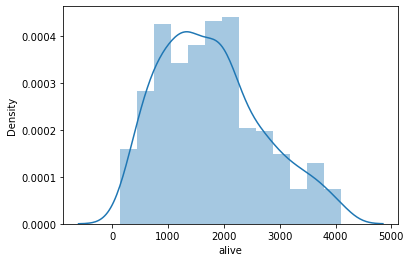

In [29]:
sns.distplot(crop_damage_other['Estimated_Insects_Count'],axlabel='alive')

<AxesSubplot:xlabel='alive', ylabel='Density'>

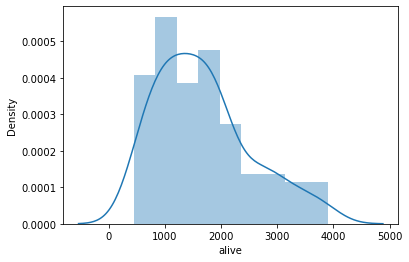

In [30]:
sns.distplot(crop_damage_pesticide['Estimated_Insects_Count'],axlabel='alive')

Text(0.5, 1.0, 'crop damage Vs Crop type')

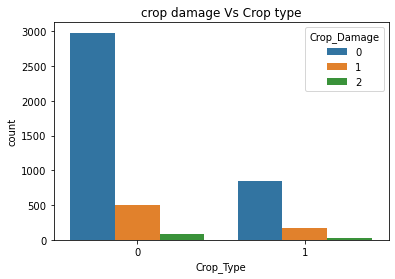

In [31]:
sns.countplot(df['Crop_Type'], hue = df['Crop_Damage'])
plt.title("crop damage Vs Crop type")

Type 0 and crop type 1 have very huge differnce in the crop that are alive. Crop type 0 are more damaged due to other reasons as compared to type 1 crop 1

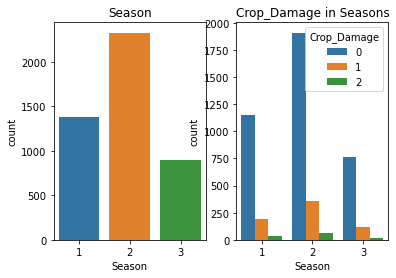

In [32]:
plt.subplot(1,2,1)
sns.countplot(df['Season'])
plt.title('Season')
plt.subplot(1,2,2)
sns.countplot(df['Season'], hue = df['Crop_Damage'])
plt.title('Crop_Damage in Seasons')
plt.show()

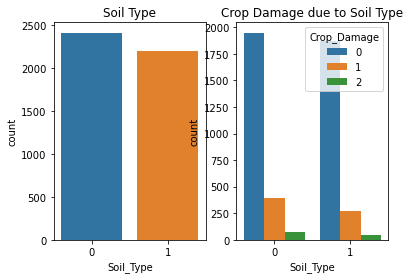

In [33]:
plt.subplot(1,2,1)
sns.countplot(df['Soil_Type'])
plt.title('Soil Type')
plt.subplot(1,2,2)
sns.countplot(df['Soil_Type'], hue = df['Crop_Damage'])
plt.title('Crop Damage due to Soil Type')
plt.show()

There is a very less effect of soil type on the crop damage.

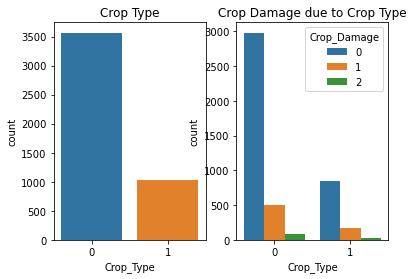

In [34]:
plt.subplot(1,2,1)
sns.countplot(df['Crop_Type'])
plt.title('Crop Type')
plt.subplot(1,2,2)
sns.countplot(df['Crop_Type'], hue = df['Crop_Damage'])
plt.title('Crop Damage due to Crop Type')
plt.show()

 In crop type has a huge effect on the crop. As crop type 0 is more alive as compaed to the crop type 1

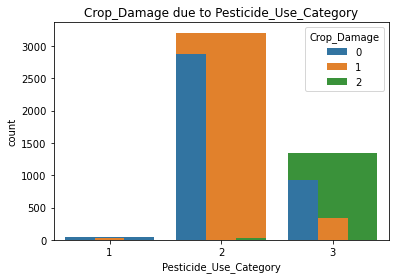

In [36]:
sns.countplot(df['Pesticide_Use_Category'])
plt.title('Pesticide_Use_Category')
sns.countplot(df['Pesticide_Use_Category'], hue = df['Crop_Damage'])
plt.title('Crop_Damage due to Pesticide_Use_Category')
plt.show()


Pesticide used catagory type has more better effect as type 2 pesticide has more crop alive than compared to ther pesticide category

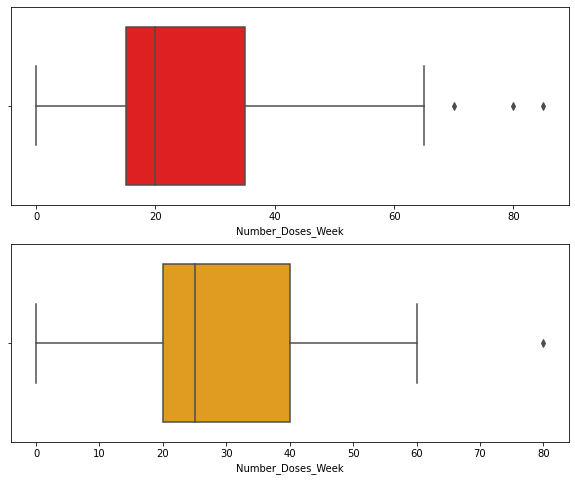

In [37]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.boxplot(crop_damage_other['Number_Doses_Week'],ax=ax1,color='red')
sns.boxplot(crop_damage_pesticide['Number_Doses_Week'],ax=ax2,color='orange')
plt.show()

 crop damaged by other reason is positively skewed and crop damaged by pesticide is more of a normal distribution. Even though they both have some outliers present. 

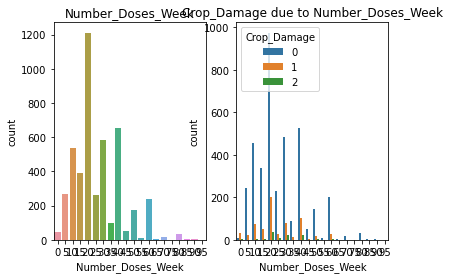

In [38]:
plt.subplot(1,2,1)
sns.countplot(df['Number_Doses_Week'])
plt.title('Number_Doses_Week')
plt.subplot(1,2,2)
sns.countplot(df['Number_Doses_Week'], hue = df['Crop_Damage'])
plt.title('Crop_Damage due to Number_Doses_Week')
plt.show()


when the number of doses of pesticide  is 20 per week then more number of crops are alive it means they are not effected by pest or damaged by pesticide

Text(0, 0.5, 'Number_weeks_quit')

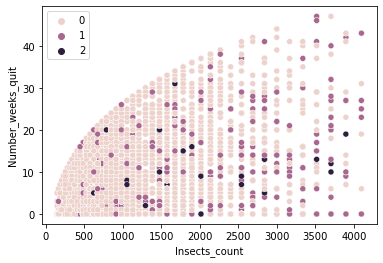

In [39]:
ax=sns.scatterplot(x=df['Estimated_Insects_Count'].values,y=df['Number_Weeks_Quit'].values,hue=df['Crop_Damage'].values)
ax.set_xlabel('Insects_count')
ax.set_ylabel('Number_weeks_quit')

In the number of weeks with no pesticide increase, insect count also increases. when the insect count increases then crop damage due to other reasons are also increased

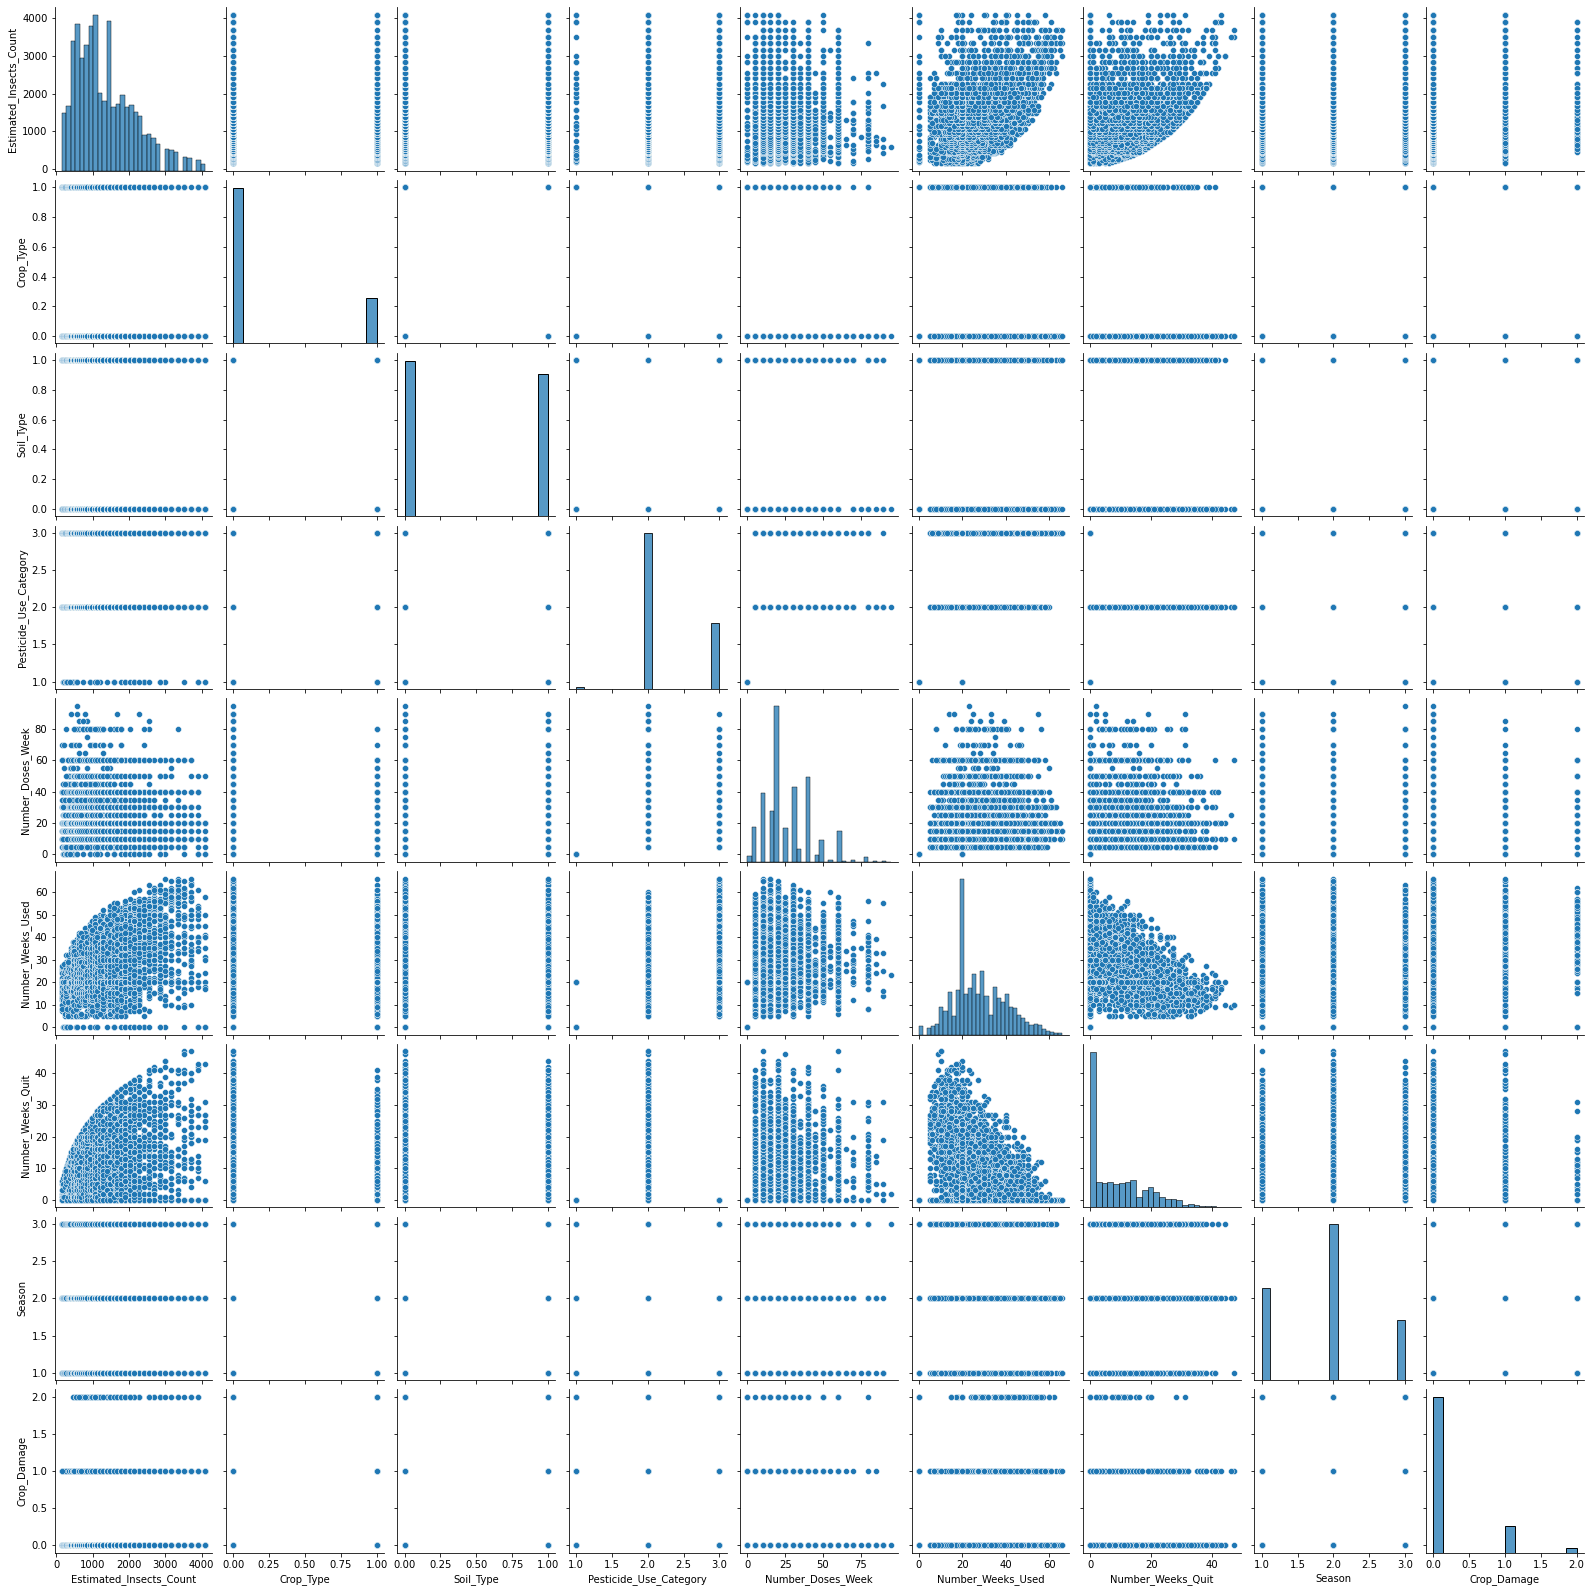

In [40]:
sns.pairplot(df)
plt.show()

array([[<AxesSubplot:title={'center':'Estimated_Insects_Count'}>,
        <AxesSubplot:title={'center':'Crop_Type'}>,
        <AxesSubplot:title={'center':'Soil_Type'}>],
       [<AxesSubplot:title={'center':'Pesticide_Use_Category'}>,
        <AxesSubplot:title={'center':'Number_Doses_Week'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Used'}>],
       [<AxesSubplot:title={'center':'Number_Weeks_Quit'}>,
        <AxesSubplot:title={'center':'Season'}>,
        <AxesSubplot:title={'center':'Crop_Damage'}>]], dtype=object)

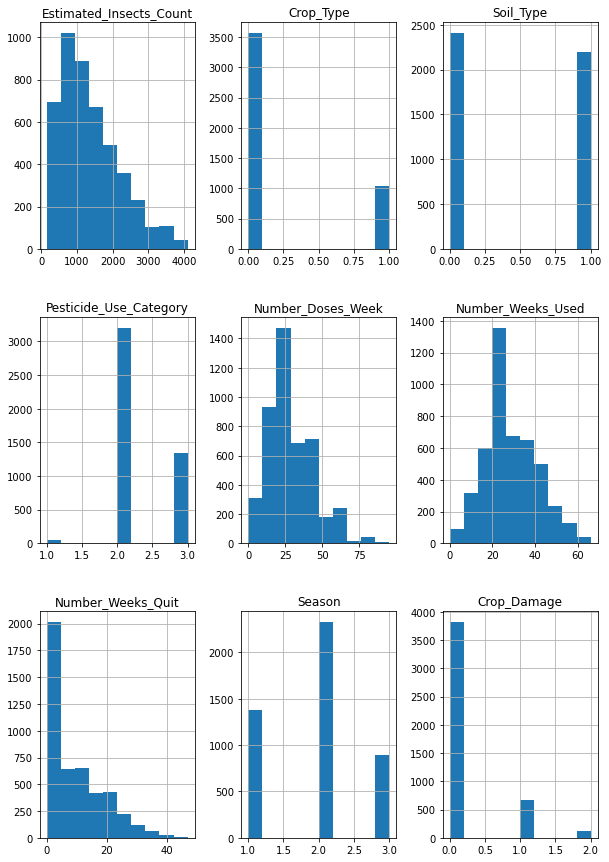

In [41]:
df.hist(figsize=(10,15))

most of data are positively skewed.

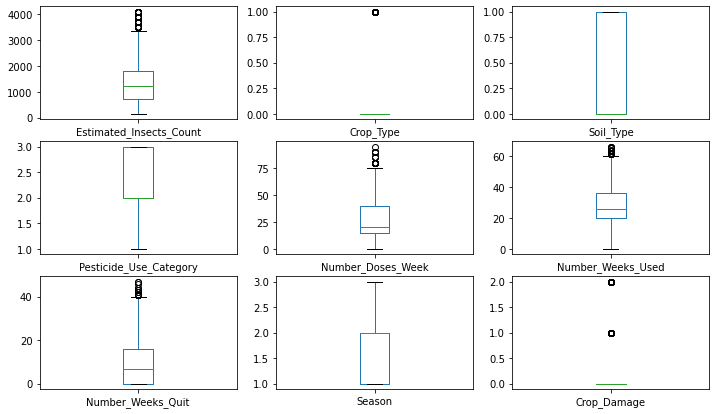

In [42]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

Insects Count, Crop Type, Number Does Week, Number Week Used and Crop Damage have outliers.will be treating the outliers

In [43]:
df.drop(['ID'],inplace=True,axis=1) #unnecessary for our analysis so dropping the column


In [46]:
#from scipy.stats import zscore
#z_score=abs(zscore(df))
#print(df.shape)
#df_new=df.loc[(z_score<3).all(axis=1)]
#print(df_new.shape)

In [47]:
#df=df_new
#print(df.shape)

# Removing the outlier removes all the columns which contains the values of Crop damaged due to Pesticides ie. Type 2 class for our target variable.so not removing them.

In [48]:
df.skew() #checking skewness

Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.438504
Number_Weeks_Quit          0.813382
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

In [49]:
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [50]:
df.skew()

Estimated_Insects_Count   -0.543203
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.518158
Number_Doses_Week         -1.181035
Number_Weeks_Used          0.438504
Number_Weeks_Quit         -0.234282
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

skewness treated successfully

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(df.columns)):
    df[df.columns[column]]=le.fit_transform(df[df.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)
mappings

[{0: 5.017279836814924,
  1: 5.0238805208462765,
  2: 5.1298987149230735,
  3: 5.135798437050262,
  4: 5.241747015059643,
  5: 5.3471075307174685,
  6: 5.44673737166631,
  7: 5.4510384535657,
  8: 5.54907608489522,
  9: 5.552959584921617,
  10: 5.648974238161206,
  11: 5.7430031878094825,
  12: 5.746203190540153,
  13: 5.8377304471659395,
  14: 5.929589143389895,
  15: 6.018593214496234,
  16: 6.021023349349527,
  17: 6.1070228877422545,
  18: 6.192362489474872,
  19: 6.194405391104672,
  20: 6.2766434893416445,
  21: 6.359573868672378,
  22: 6.439350371100098,
  23: 6.440946540632921,
  24: 6.519147287940395,
  25: 6.595780513961311,
  26: 6.597145701886651,
  27: 6.672032945461067,
  28: 6.673297967767654,
  29: 6.7464121285733745,
  30: 6.747586526829315,
  31: 6.82001636467413,
  32: 6.821107472256465,
  33: 6.892641641172089,
  34: 6.963189985870238,
  35: 7.0326242610280065,
  36: 7.10085190894405,
  37: 7.167809184316444,
  38: 7.168579897264035,
  39: 7.234177179749849,
  40: 7

In [52]:
df.head()#checking the first 5 encoded data

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,4,1,0,0,0,0,0,0,0
1,5,1,0,0,0,0,0,1,1
2,9,1,0,0,0,0,0,1,1
3,9,1,1,0,0,0,0,1,1
4,13,1,0,0,0,0,0,1,1


# Data Prepration for Model Training

In [53]:
x = df.drop(['Crop_Damage'],axis=1)
y = df['Crop_Damage']

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4370 entries, 0 to 4598
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Estimated_Insects_Count  4370 non-null   int32
 1   Crop_Type                4370 non-null   int32
 2   Soil_Type                4370 non-null   int32
 3   Pesticide_Use_Category   4370 non-null   int32
 4   Number_Doses_Week        4370 non-null   int32
 5   Number_Weeks_Used        4370 non-null   int32
 6   Number_Weeks_Quit        4370 non-null   int32
 7   Season                   4370 non-null   int32
dtypes: int32(8)
memory usage: 170.7 KB


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x)
x_train=pd.DataFrame(x_train,columns=x.columns)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# GridSearchCV to find the best parameters in Logistic Regression

In [59]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('accuracy score',accuracy_score(y_test,predlr))
print('confusion matrix',confusion_matrix(y_test,predlr))
print('classification report',classification_report(y_test,predlr))

accuracy score 0.851258581235698
confusion matrix [[1107   23]
 [ 172    9]]
classification report               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1130
           1       0.28      0.05      0.08       181

    accuracy                           0.85      1311
   macro avg       0.57      0.51      0.50      1311
weighted avg       0.78      0.85      0.80      1311



In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
parameters={'C':[1,10],'random_state':range(42,100)}
lr=LogisticRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [61]:
lr=LogisticRegression(C=10, random_state=42)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('accuracy score',accuracy_score(y_test,predlr))
print('confusion matrix',confusion_matrix(y_test,predlr))
print('classification report',classification_report(y_test,predlr))

accuracy score 0.8482074752097636
confusion matrix [[1103   27]
 [ 172    9]]
classification report               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1130
           1       0.25      0.05      0.08       181

    accuracy                           0.85      1311
   macro avg       0.56      0.51      0.50      1311
weighted avg       0.78      0.85      0.80      1311



In [62]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print('a r',accuracy_score(y_test,predgnb))
print ('cn rep',confusion_matrix(y_test,predgnb))
print('cls reprt',classification_report(y_test,predgnb))

a r 0.8199847444698704
cn rep [[1023  107]
 [ 129   52]]
cls reprt               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1130
           1       0.33      0.29      0.31       181

    accuracy                           0.82      1311
   macro avg       0.61      0.60      0.60      1311
weighted avg       0.81      0.82      0.82      1311



In [63]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8619374523264683
[[1130    0]
 [ 181    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1130
           1       0.00      0.00      0.00       181

    accuracy                           0.86      1311
   macro avg       0.43      0.50      0.46      1311
weighted avg       0.74      0.86      0.80      1311



In [64]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7795575896262396
[[959 171]
 [118  63]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1130
           1       0.27      0.35      0.30       181

    accuracy                           0.78      1311
   macro avg       0.58      0.60      0.59      1311
weighted avg       0.80      0.78      0.79      1311



In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.851258581235698
[[1078   52]
 [ 143   38]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1130
           1       0.42      0.21      0.28       181

    accuracy                           0.85      1311
   macro avg       0.65      0.58      0.60      1311
weighted avg       0.82      0.85      0.83      1311



In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.858886346300534
[[1091   39]
 [ 146   35]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1130
           1       0.47      0.19      0.27       181

    accuracy                           0.86      1311
   macro avg       0.68      0.58      0.60      1311
weighted avg       0.83      0.86      0.83      1311



In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8321891685736079
[[1061   69]
 [ 151   30]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1130
           1       0.30      0.17      0.21       181

    accuracy                           0.83      1311
   macro avg       0.59      0.55      0.56      1311
weighted avg       0.80      0.83      0.81      1311



In [69]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abc.score(x_train,y_train)
predabc=abc.predict(x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.8627002288329519
[[1093   37]
 [ 143   38]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1130
           1       0.51      0.21      0.30       181

    accuracy                           0.86      1311
   macro avg       0.70      0.59      0.61      1311
weighted avg       0.83      0.86      0.84      1311



In [70]:
models=pd.DataFrame({'Model':['Logistics Regression','SVM_linear','Decision Tree','Random Forest','Gradient Boosting','KNeighbors','GaussianNB','AdaBoost'],
                     'Training Accuracy':[(lr.score(x_train,y_train)*100),svc.score(x_train,y_train)*100,dt.score(x_train,y_train)*100,rfc.score(x_train,y_train)*100,gbc.score(x_train,y_train)*100,knn.score(x_train,y_train)*100,gnb.score(x_train,y_train)*100,abc.score(x_train,y_train)*100],
                     'Test Accuracy':[(lr.score(x_test,y_test)*100),svc.score(x_test,y_test)*100,dt.score(x_test,y_test)*100,rfc.score(x_test,y_test)*100,gbc.score(x_test,y_test)*100,knn.score(x_test,y_test)*100,gnb.score(x_test,y_test)*100,abc.score(x_test,y_test)*100]})

models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Test Accuracy
2,Decision Tree,99.901929,77.955759
3,Random Forest,99.901929,85.125858
5,KNeighbors,88.002615,83.218917
4,Gradient Boosting,87.773782,85.888635
7,AdaBoost,86.433475,86.270023
1,SVM_linear,85.027787,86.193745
0,Logistics Regression,84.864335,84.820748
6,GaussianNB,83.099052,81.998474


In [72]:
from sklearn import model_selection
kfold=model_selection.KFold(n_splits=10, random_state=42)
models=[('Logistic Regression', lr), ('Support Vector Machine (linear)', svc),('Decision Tree',dt),
        ('Random Forest',rfc),('GradientBoostingClassifier', gbc),('KNeighborsClassifier', knn),
       ('GaussianNB', gnb),('AdaBoostClassifier', abc)]

for model in models:
    results=model_selection.cross_val_score(model[1],x_train,y_train,cv=kfold,scoring='accuracy')
    print(f"Cross validated Accuracy of {model[0]}: {results.mean()*100:.2f}%")

Cross validated Accuracy of Logistic Regression: 84.86%
Cross validated Accuracy of Support Vector Machine (linear): 85.03%
Cross validated Accuracy of Decision Tree: 77.80%
Cross validated Accuracy of Random Forest: 84.21%
Cross validated Accuracy of GradientBoostingClassifier: 85.48%
Cross validated Accuracy of KNeighborsClassifier: 84.57%
Cross validated Accuracy of GaussianNB: 83.03%
Cross validated Accuracy of AdaBoostClassifier: 85.13%


Gradient Boosting Classifier gives the best score of 85.48% and the model is also not suffering from Underfitting anf Overfitting

In [73]:
from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'n_estimators':[200],
    }
#params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'criterion':['gini','entropy']}
grid_search_cv = GridSearchCV(GradientBoostingClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   36.6s finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'n_estimators': [200]},
             verbose=1)

In [74]:
grid_search_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.025, n_estimators=200,
                           random_state=42)

In [75]:
#Gradient Boosting Classifier with our best result
gbc=GradientBoostingClassifier(learning_rate=0.25, random_state=42, n_estimators=200)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8482074752097636
[[1063   67]
 [ 132   49]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1130
           1       0.42      0.27      0.33       181

    accuracy                           0.85      1311
   macro avg       0.66      0.61      0.62      1311
weighted avg       0.83      0.85      0.83      1311



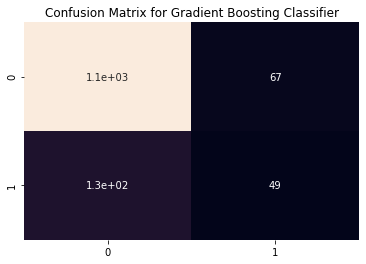

In [76]:
cm=confusion_matrix(y_test,gbc.predict(x_test))
sns.heatmap(cm,annot=True,cbar=False,)
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

# Saving model

In [77]:
import joblib
joblib.dump(gbc,'agriculture.pkl')

['agriculture.pkl']

# Loading test Dataset

In [82]:
df1=pd.read_excel('E:/test_agriculture.xlsx')

In [83]:
df1.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [85]:
df1.shape

(1199, 9)

we have 1199 rows and 9 columns

In [87]:
df1.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

Number_Weeks_Used have 119 null values.

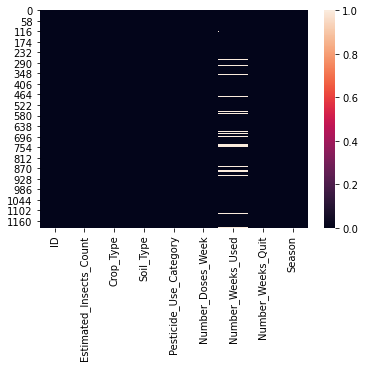

In [88]:
sns.heatmap(df1.isnull())
plt.show()


In [89]:
for col in ['Number_Weeks_Used']: #imputing null data
    df1[col].fillna(df1[col].mode()[0],inplace=True)

In [90]:
df1.drop(['ID'],inplace=True,axis=1) #dropping it as not neccessary for our analysis

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  1199 non-null   int64  
 1   Crop_Type                1199 non-null   int64  
 2   Soil_Type                1199 non-null   int64  
 3   Pesticide_Use_Category   1199 non-null   int64  
 4   Number_Doses_Week        1199 non-null   int64  
 5   Number_Weeks_Used        1199 non-null   float64
 6   Number_Weeks_Quit        1199 non-null   int64  
 7   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 75.0 KB


3 types of Data Types in our dataset:
object - ID
int64 - Estimated_Insects_Count, Crop_Type,
         Soil_Type, Pesticide_Use_Category,
         Number_Doses_Week, Number_Weeks_Quit,
         Season,
float64 - Number_Weeks_Used

In [92]:
df1['Number_Weeks_Used']=df1['Number_Weeks_Used'].astype('int64') #converted in int datatypes from float

In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Estimated_Insects_Count  1199 non-null   int64
 1   Crop_Type                1199 non-null   int64
 2   Soil_Type                1199 non-null   int64
 3   Pesticide_Use_Category   1199 non-null   int64
 4   Number_Doses_Week        1199 non-null   int64
 5   Number_Weeks_Used        1199 non-null   int64
 6   Number_Weeks_Quit        1199 non-null   int64
 7   Season                   1199 non-null   int64
dtypes: int64(8)
memory usage: 75.0 KB


All data are in integer type only now

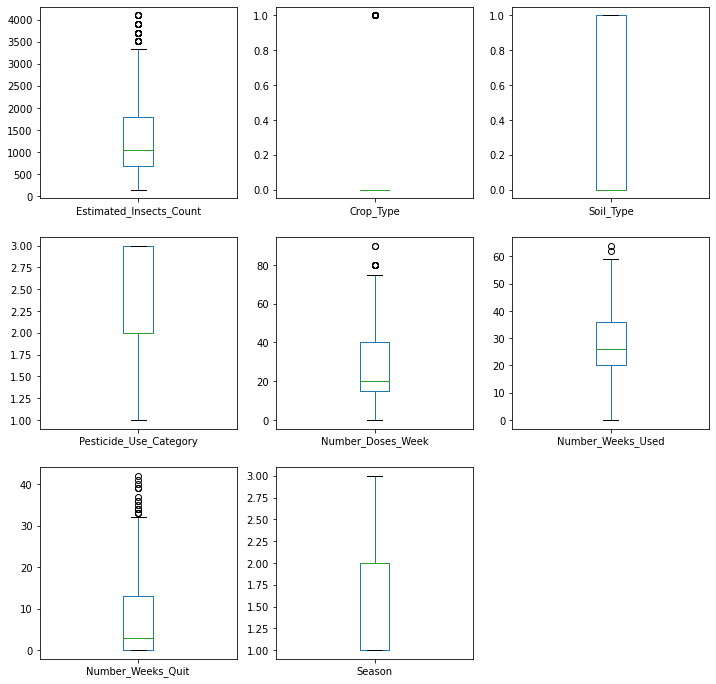

In [95]:
df1.plot(kind='box',subplots=True,layout=(3,3),figsize=(12,12))
plt.show()

some outliers are present but not treating them as i will loose the data which are needed

In [96]:
df1.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.383855
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

In [98]:
for col in df1.columns:
    if df[col].skew()>0.55:
        df1[col]=np.log1p(df1[col])
df1.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category    -0.233208
Number_Doses_Week         -1.427895
Number_Weeks_Used          0.383855
Number_Weeks_Quit          0.197853
Season                     0.155872
dtype: float64

skewness are treated successfully

In [100]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(df1.columns)):
    df1[df1.columns[column]]=le.fit_transform(df1[df1.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)
mappings

[{0: 150,
  1: 151,
  2: 168,
  3: 188,
  4: 209,
  5: 231,
  6: 232,
  7: 256,
  8: 257,
  9: 283,
  10: 311,
  11: 312,
  12: 342,
  13: 375,
  14: 410,
  15: 411,
  16: 448,
  17: 488,
  18: 489,
  19: 531,
  20: 577,
  21: 625,
  22: 626,
  23: 677,
  24: 731,
  25: 732,
  26: 789,
  27: 790,
  28: 850,
  29: 851,
  30: 915,
  31: 916,
  32: 984,
  33: 1056,
  34: 1132,
  35: 1212,
  36: 1296,
  37: 1297,
  38: 1385,
  39: 1478,
  40: 1575,
  41: 1576,
  42: 1678,
  43: 1785,
  44: 1786,
  45: 1898,
  46: 2015,
  47: 2016,
  48: 2138,
  49: 2139,
  50: 2267,
  51: 2401,
  52: 2402,
  53: 2541,
  54: 2542,
  55: 2687,
  56: 2688,
  57: 2840,
  58: 2999,
  59: 3164,
  60: 3165,
  61: 3336,
  62: 3337,
  63: 3515,
  64: 3516,
  65: 3702,
  66: 3895,
  67: 3896,
  68: 4096,
  69: 4097},
 {0: 0.0, 1: 0.6931471805599453},
 {0: 0, 1: 1},
 {0: 0.6931471805599453, 1: 1.0986122886681098, 2: 1.3862943611198906},
 {0: 0.0,
  1: 1.791759469228055,
  2: 2.3978952727983707,
  3: 2.772588722239781

In [101]:
xt = df1[['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit','Season']]
xt.shape

(1199, 8)

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(xt)
xt=pd.DataFrame(xt,columns=df1.columns)

# Load the saved outcome from train data

In [103]:
gbctest=joblib.load('agriculture.pkl')
gbctest

GradientBoostingClassifier(learning_rate=0.25, n_estimators=200,
                           random_state=42)

In [105]:
gbcpredict=gbctest.predict(xt)
gbcpredict

array([1, 1, 1, ..., 0, 0, 0])

In [106]:
pd.DataFrame(gbcpredict).rename(columns = {0 : 'Crop_Damage'})

,Crop_Damage
0,1
1,1
2,1
3,1
4,0
...,...
1194,0
1195,0
1196,0
1197,0


In [107]:
dffinal = pd.read_excel('E:/test_agriculture.xlsx')

dfID = dffinal[['ID']]

dffinal = pd.concat([dfID, pd.DataFrame(gbcpredict).rename(columns = {0 : 'Crop_Damage'})], axis=1)

dffinal

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,0
...,...,...
1194,F00003133,0
1195,F00003135,0
1196,F00003138,0
1197,F00003149,0


In [108]:
dffinal['Crop_Damage'].value_counts()

0    1062
1     137
Name: Crop_Damage, dtype: int64

93% crop is alive and 6.5% damaged due to other cause



In [109]:
dffinal.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,0


In [110]:
dffinal.tail()

,ID,Crop_Damage
1194,F00003133,0
1195,F00003135,0
1196,F00003138,0
1197,F00003149,0
1198,F00003150,0


Model is performing well on the test data and all the results are visible against the ID.


# Saving the file

In [111]:
dffinal.to_csv('Agriculture.csv',index=False)

Tested  dataset and predicted the result on our test dataset well.